In [75]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [76]:
# read the data
Data = pd.read_csv("Data/census_income_dataset.csv",header=0,index_col=0)
Data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


 ### Task 1/2 : Create three different plots (plot types) using the Census Income dataset 

Original Length : 16281
0 Null Age rows removed
New length : 16281
count    16281.000000
mean        38.767459
std         13.849187
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: AGE, dtype: float64


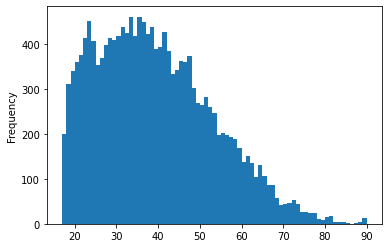

In [77]:
# Plot Age distribution 
original_len = len(Data)
print("Original Length : " + str(original_len))
Data = Data[~Data["AGE"].isnull()]
print(str((original_len) - len(Data)) + " Null Age rows removed" )
print("New length : " + str(len(Data)))

print("=================")

print(Data["AGE"].describe())

print("=================")

Data["AGE"].plot.hist(bins=73)
plt.show()

 Husband           6523
 Unmarried         5957
 Own-child         2513
 Wife               763
 Other-relative     525
Name: RELATIONSHIP, dtype: int64
 Husband           6523
 Unmarried         5957
 Own-child         2513
 Wife               763
 Other-relative     525
Name: RELATIONSHIP, dtype: int64


Text(0, 0.5, '')

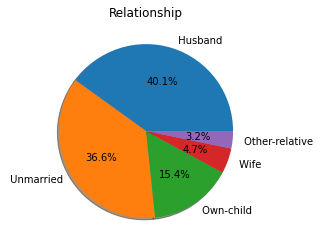

In [85]:
# visualize how often does each relationship status occur
print(Data["RELATIONSHIP"].value_counts())
# change each Not-in-family to Unmarried
Data.loc[Data["RELATIONSHIP"] == ' Not-in-family',"RELATIONSHIP"] = " Unmarried"
print(Data["RELATIONSHIP"].value_counts())
# print(Data.head())
Data["RELATIONSHIP"].value_counts().plot(kind="pie",title="Relationship",autopct='%1.1f%%',shadow=True)
plt.ylabel(ylabel=None)

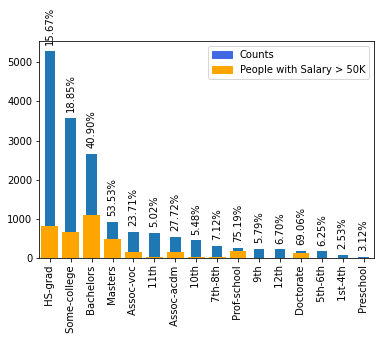

In [148]:
# Investigate and visualize if there is a correlation between educational level and salary
Data["EDUCATION"].value_counts().plot.bar()
count_values = Data["EDUCATION"].value_counts().to_numpy()
# see how many people their salary more than 50K in each education
education = dict(Data["EDUCATION"].value_counts())
X = []
salary_counts = []
salary_labels = []
for key in education :
    sub_data = Data[(Data["EDUCATION"] == key) & (Data["SALARY"] == " >50K")]
    counts = len(sub_data)
    precentage = "{:.2f}%".format((counts / education[key]) * 100)
    salary_labels.append(precentage)
    X.append(key)
    salary_counts.append(counts)
for i in range(len(X)):
    plt.text(i, count_values[i] + 200, salary_labels[i], ha = 'center',rotation='vertical',fontsize=10)
plt.bar(X,salary_counts,color="orange")
colors = {'Counts':'royalblue', 'People with Salary > 50K':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

### Task 2/2 : Perform some reasonable statistics using the available data and write the results in a sentence
#### - In each WORKCLASS the chances you have to gain more than 50K is equal excepts for federal government you have better chances.

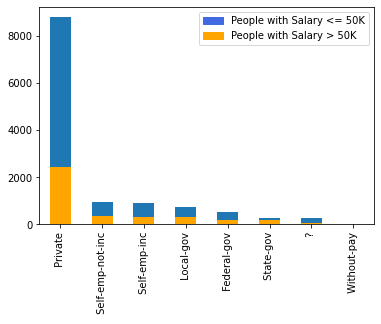

In [165]:
# for each work class I am going to see the numbers of people exceeds the 50K
Data[Data["SALARY"] == " <=50K"]["WORKCLASS"].value_counts().plot.bar()
Data[Data["SALARY"] == " >50K"]["WORKCLASS"].value_counts().plot.bar(color="orange")

colors = {'People with Salary <= 50K':'royalblue', 'People with Salary > 50K':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()